In [1]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 556.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 105.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.3 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

In [3]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [6]:
base_dir = '/content/drive/My Drive/AWEDataset/awe/Split_Data'  # Adjust this path to your dataset location
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 696 images belonging to 10 classes.
Found 196 images belonging to 10 classes.
Found 104 images belonging to 10 classes.


In [8]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [9]:
for layer in base_model.layers:
    layer.trainable = False

In [10]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 283s 13s/step - accuracy: 0.1472 - loss: 2.6201 - val_accuracy: 0.4010 - val_loss: 1.9282
Epoch 2/50
 1/21 ━━━━━━━━━━━━━━━━━━━━ 2:07 6s/step - accuracy: 0.3125 - loss: 2.2530

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


21/21 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.3125 - loss: 2.2530 - val_accuracy: 0.4375 - val_loss: 1.9114
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 173s 8s/step - accuracy: 0.2956 - loss: 2.0453 - val_accuracy: 0.5208 - val_loss: 1.5796
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.2812 - loss: 1.9242 - val_accuracy: 0.5573 - val_loss: 1.5580
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 172s 8s/step - accuracy: 0.3694 - loss: 1.7906 - val_accuracy: 0.7135 - val_loss: 1.2446
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.6250 - loss: 1.3922 - val_accuracy: 0.6979 - val_loss: 1.2470
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 169s 8s/step - accuracy: 0.4719 - loss: 1.5209 - val_accuracy: 0.6927 - val_loss: 1.0158
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5938 - loss: 1.3003 - val_accuracy: 0.6562 - val_loss: 1.0198
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 168s 8s/step - accuracy: 0.5340 - loss: 1.3965 - val_accuracy: 0.8073 - val_loss: 0.7302

In [13]:
# Save the model in .h5 format
model.save('densenet121_model.h5')

# Alternatively, save the model in .keras format (recommended for newer TensorFlow versions)
model.save('densenet121_model.keras')

In [14]:
from tensorflow.keras.models import load_model

# Load the model from .h5 file
loaded_model = load_model('densenet121_model.h5')

# Alternatively, load from .keras file
# loaded_model = load_model('densenet121_model.keras')

In [15]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = loaded_model.evaluate(test_generator)

# Print the results
print(f"Test Loss: {test_loss*100}")
print(f"Test Accuracy: {test_accuracy*100}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 6s/step - accuracy: 1.0000 - loss: 0.0095
Test Loss: 0.910043902695179
Test Accuracy: 100.0


In [16]:
import numpy as np

# Get predictions for the test dataset
predictions = loaded_model.predict(test_generator)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels from the test dataset
true_classes = test_generator.classes

# Print some predictions and true labels for comparison
print("Predicted classes:", predicted_classes[:10])
print("True classes:", true_classes[:10])

4/4 ━━━━━━━━━━━━━━━━━━━━ 25s 6s/step
Predicted classes: [0 0 0 0 0 0 0 0 0 0]
True classes: [0 0 0 0 0 0 0 0 0 0]


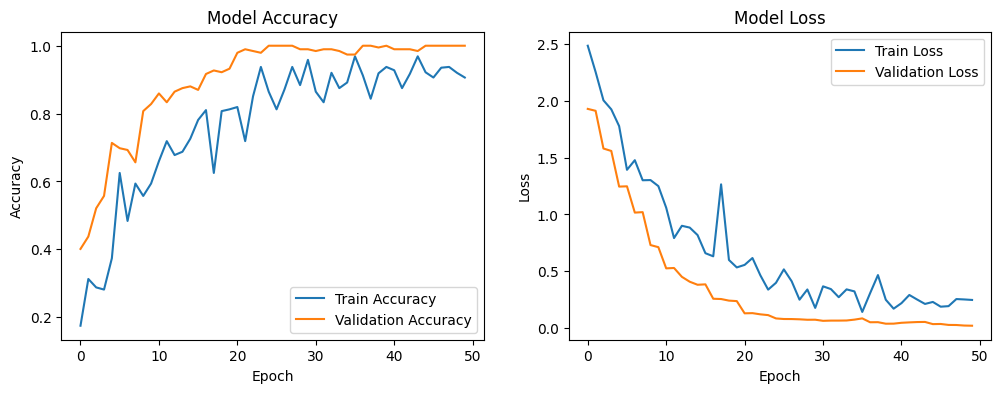

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [18]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import SGD

# Define the DenseNet121 base model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model to use pretrained weights

# Add custom layers on top of the base model
x = GlobalAveragePooling2D()(base_model.output)  # Reduce spatial dimensions
x = Dense(512, activation='relu')(x)             # Fully connected layer
x = Dropout(0.5)(x)                              # Dropout for regularization
x = Dense(256, activation='relu')(x)             # Another fully connected layer
x = Dropout(0.5)(x)                              # Additional dropout
x = Dense(10, activation='softmax')(x)           # Output layer (adjust 10 to your number of classes)

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),  # SGD optimizer
    loss='categorical_crossentropy',                  # Loss for multi-class classification
    metrics=['accuracy']                              # Track accuracy
)

In [19]:
# Make predictions
predictions = loaded_model.predict(test_generator, steps=len(test_generator), verbose=0)

# Print the predicted class labels
for encoded_labels in np.round(predictions):
    print(np.argmax(encoded_labels))

0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
